In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Drafting EDA

In [22]:
# Load the training from CSV files
train_data = pd.read_csv("./train_cleaned.csv")

In [23]:
train_data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.000000,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.000000,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,79.380242,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.000000,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.000000,0


### KDE Plots

<Axes: xlabel='age', ylabel='Density'>

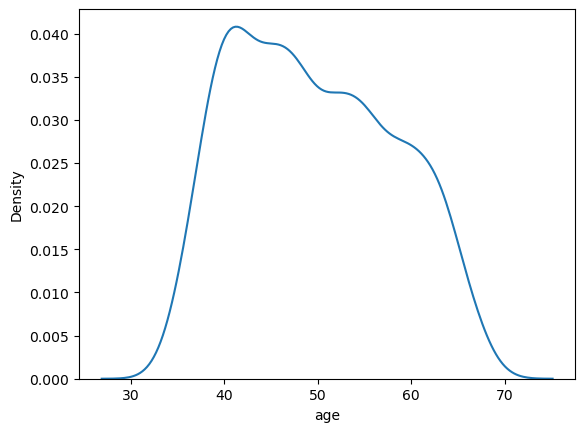

In [24]:
sns.kdeplot(train_data, x=train_data['age'])

<Axes: xlabel='totChol', ylabel='Density'>

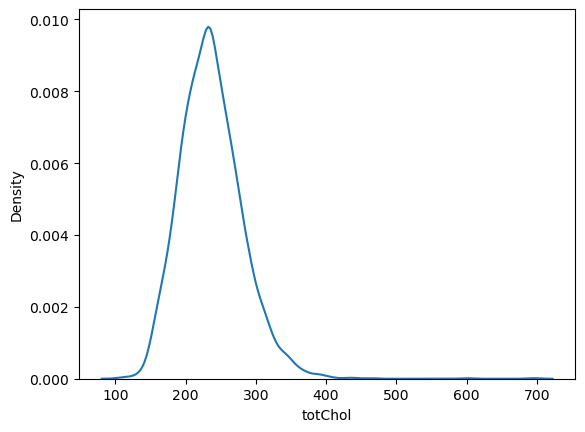

In [25]:
sns.kdeplot(train_data, x=train_data['totChol'])

<Axes: xlabel='sysBP', ylabel='Density'>

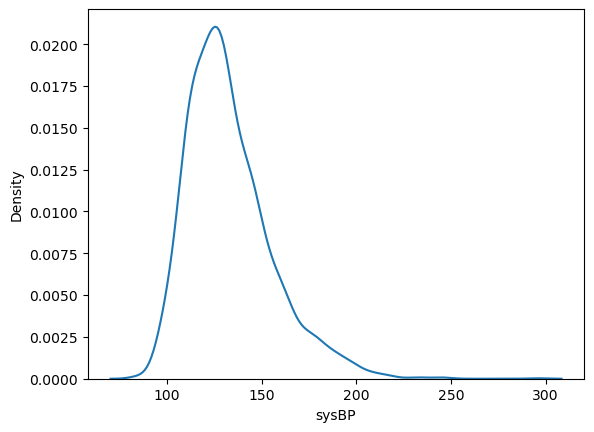

In [26]:
sns.kdeplot(train_data, x=train_data['sysBP'])


<Axes: xlabel='diaBP', ylabel='Density'>

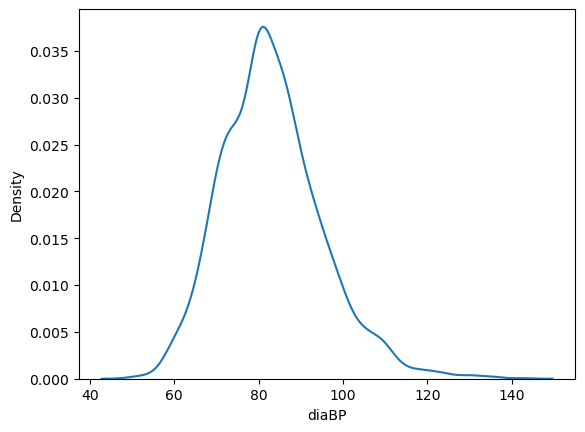

In [27]:
sns.kdeplot(train_data, x=train_data['diaBP'])

<Axes: xlabel='BMI', ylabel='Density'>

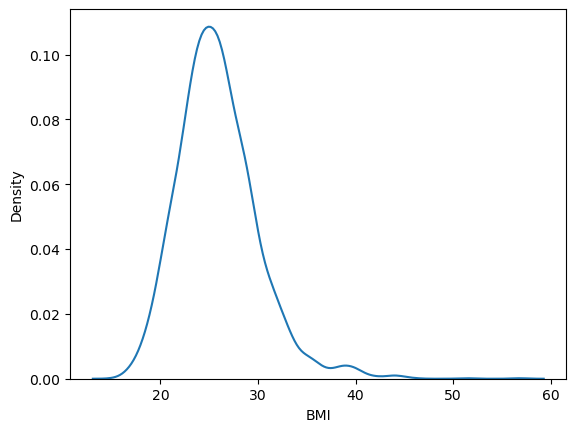

In [28]:
sns.kdeplot(train_data, x=train_data['BMI'])

<Axes: xlabel='cigsPerDay', ylabel='Density'>

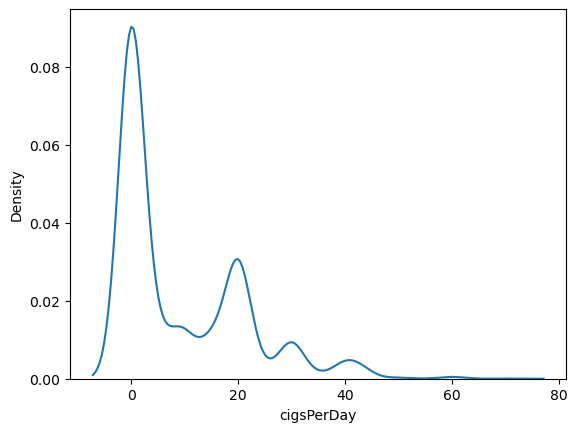

In [29]:
sns.kdeplot(train_data, x=train_data['cigsPerDay'])

<Axes: xlabel='heartRate', ylabel='Density'>

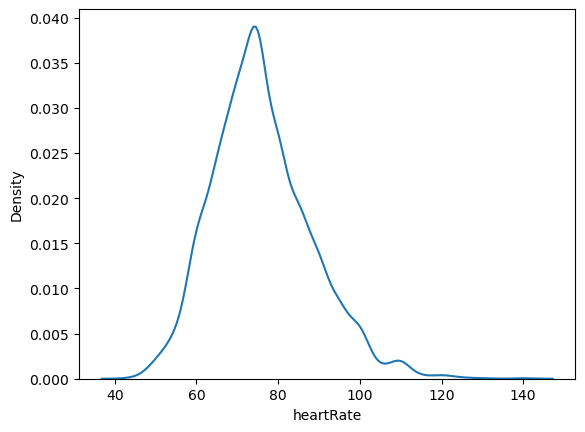

In [30]:
sns.kdeplot(data=train_data, x=train_data['heartRate'])

> All the continuous variables are unimodal other than cigsPerDay. This is because the participants are split between smokers and non-smokers, so there is a significant peak at 0 for the non-smokers. Then, the frequencies fluctuate as the number of cigsPerDay increases.

### Correlation & Outliers

In [32]:
# Define outliers method
def outliers(data, column_name):
    # Calculate Q1 and Q3 of the column
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Determine the outlier cutoffs
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = (data[column_name] < lower_bound) | (data[column_name] > upper_bound)

    print(outliers.sum())
    # Single out points that are outliers
    print(outliers[outliers])

In [33]:
for column in train_data.columns:
  print(f"Outliers for {column}: ")
  outliers(train_data, column)
  print("\n")

Outliers for sex: 
0
Series([], Name: sex, dtype: bool)


Outliers for age: 
0
Series([], Name: age, dtype: bool)


Outliers for education: 
0
Series([], Name: education, dtype: bool)


Outliers for currentSmoker: 
0
Series([], Name: currentSmoker, dtype: bool)


Outliers for cigsPerDay: 
10
638     True
646     True
851     True
1226    True
1475    True
1491    True
1608    True
2152    True
2228    True
2374    True
Name: cigsPerDay, dtype: bool


Outliers for BPMeds: 
94
49      True
66      True
120     True
126     True
146     True
        ... 
3057    True
3065    True
3068    True
3082    True
3096    True
Name: BPMeds, Length: 94, dtype: bool


Outliers for prevalentStroke: 
21
182     True
219     True
472     True
509     True
510     True
980     True
1102    True
1132    True
1207    True
1550    True
1745    True
1886    True
1970    True
2203    True
2225    True
2385    True
2621    True
2654    True
2851    True
3063    True
3068    True
Name: prevalentStroke, dtype: 

In [34]:
train_data.corr()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1.000000,-0.038939,0.006739,0.198117,0.325401,-0.043856,0.007104,0.010722,0.020140,-0.069999,-0.027647,0.064950,0.083549,-0.109369,0.019097,0.097138
age,-0.038939,1.000000,-0.174209,-0.216628,-0.199792,0.113578,0.064746,0.298794,0.094140,0.261018,0.396181,0.207611,0.138060,-0.016787,0.103229,0.225568
education,0.006739,-0.174209,1.000000,0.014687,0.006071,-0.013158,-0.031615,-0.083263,-0.040596,-0.026812,-0.138959,-0.067689,-0.147856,-0.074702,-0.040315,-0.052207
currentSmoker,0.198117,-0.216628,0.014687,1.000000,0.768088,-0.052526,-0.033461,-0.098607,-0.038440,-0.024854,-0.133829,-0.102881,-0.176126,0.064442,-0.057870,0.001644
cigsPerDay,0.325401,-0.199792,0.006071,0.768088,1.000000,-0.048729,-0.031091,-0.067828,-0.035730,-0.014255,-0.090804,-0.049933,-0.094976,0.080799,-0.060150,0.046104
BPMeds,-0.043856,0.113578,-0.013158,-0.052526,-0.048729,1.000000,0.123311,0.249816,0.052946,0.070186,0.248394,0.196987,0.091196,-0.004864,0.026706,0.090762
prevalentStroke,0.007104,0.064746,-0.031615,-0.033461,-0.031091,0.123311,1.000000,0.068668,-0.013348,-0.008946,0.056260,0.038972,0.004249,-0.024421,0.005200,0.062357
prevalentHyp,0.010722,0.298794,-0.083263,-0.098607,-0.067828,0.249816,0.068668,1.000000,0.081750,0.165575,0.690353,0.614522,0.299784,0.146410,0.081373,0.163910
diabetes,0.020140,0.094140,-0.040596,-0.038440,-0.035730,0.052946,-0.013348,0.081750,1.000000,0.044381,0.104852,0.045949,0.085949,0.043512,0.617187,0.105644
totChol,-0.069999,0.261018,-0.026812,-0.024854,-0.014255,0.070186,-0.008946,0.165575,0.044381,1.000000,0.206371,0.148935,0.111082,0.081018,0.030663,0.099083


> Based on the correlation matrix, the variables that are strongly associated with TenYearCHD are age (0.226), and systolic blood pressure (0.206).

In [35]:
binary_columns = ['sex', 'currentSmoker', 'education', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds']
for c in binary_columns:
  print(train_data['TenYearCHD'].groupby(train_data[c]).describe())

      count      mean       std  min  25%  50%  75%  max
sex                                                     
0    1803.0  0.122573  0.328038  0.0  0.0  0.0  0.0  1.0
1    1377.0  0.193174  0.394931  0.0  0.0  0.0  0.0  1.0
                count      mean       std  min  25%  50%  75%  max
currentSmoker                                                     
0              1619.0  0.152563  0.359677  0.0  0.0  0.0  0.0  1.0
1              1561.0  0.153748  0.360822  0.0  0.0  0.0  0.0  1.0
            count      mean       std  min  25%  50%  75%  max
education                                                     
1.0        1310.0  0.190076  0.392511  0.0  0.0  0.0  0.0  1.0
2.0        1034.0  0.115087  0.319281  0.0  0.0  0.0  0.0  1.0
3.0         495.0  0.139394  0.346708  0.0  0.0  0.0  0.0  1.0
4.0         341.0  0.146628  0.354254  0.0  0.0  0.0  0.0  1.0
                  count      mean       std  min  25%  50%  75%  max
prevalentStroke                                          

> By looking at a summary table of TenYearCHD grouped by categorical variables, we see that there is a slight difference in the mean of women who have TenYearCHD than men (0.122 vs. 0.193). There doesn't seem to be a difference in average TenYearCHD for current vs. non-smoker, which is surprising considering general perspectives on heart health. In education, there is some variation in the averages of TenYearCHD. An education of "some high school" warrants the highest mean of 0.19 for that group, while "college" is second with a mean of 0.1466. For the proportion of the population that has prevalent strokes, the TenYearCHD average is almost 0.43, which is much higher than the population that's free of disease (0.15 average). The difference in averages persists with the prevalent hypertensive population, with an average TenYearCHD more than double those without prevalent hypertension (0.24 vs 0.112). Diabetes seems to be a strong indicator of TenYearCHD, with a 162% increase in the frequency of TenYearCHD for those with diabetes versus those without. Similarly, BPMeds is also a strong indicator with a 131% increase in the frequency of TenYearCHD.

# kNN classifier

> Based on the correlation matrix and the summary table of TenYearCHD grouped by categorical variables, we've decided the most predictive variables of TenYearCHD are prevalentStroke, prevalentHyp, diabetes, BPMeds, sex, education, age, and sysBP. 

NOTE: THESE VARIABLES ARE SUBJECT TO CHANGE. WE SHOULD PROBABLY DO SOME TRANSFORMATIONS REGARDING SMOKING. 

In [36]:
y = train_data['TenYearCHD']
predictive_vars = ['prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds', 'sex', 'education', 'age', 'sysBP']
X = train_data.loc[:,predictive_vars]

> Maxmin normalize all the variables in X

In [37]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u
X = X.apply(maxmin)

> Split data into 80% training and 20% for evaluation

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

> Determine optimal value of $k$ for the data

[48]


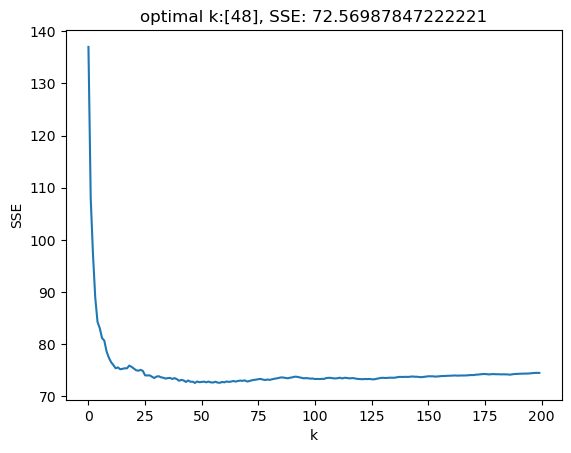

In [45]:
from sklearn.neighbors import KNeighborsRegressor 
import matplotlib.pyplot as plt

k_bar = 200
SSE = np.zeros(k_bar)

for k in range(k_bar):
  fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test - y_hat) **2)

minSSE = np.min(SSE)
minIndex = np.where(SSE == minSSE)
optimal_k = minIndex[0] + 1
print(optimal_k)

plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title(f"optimal k:{optimal_k}, SSE: {minSSE}")
plt.ylabel('SSE')
plt.show()

> Run the kNN classifier with the optimal $k$ value and determine its accuracy. 

In [46]:
model = KNeighborsRegressor(n_neighbors=48).fit(X_train,y_train)
y_hat = model.predict(X_test)
SSE_final = np.sum( (y_test-y_hat)**2 )

accuracy = model.score(X_test,y_test)
print('Accuracy: ', accuracy)

pd.crosstab(y_test, y_hat)

# plot, axes = plt.subplots()
# plt.scatter(y_test,y_hat)
# plt.title('k: '+str(40)+', SSE: '+str(SSE_final))
# axes.set_ylim(0, 1)
# axes.set_xlim(0, 1)
# plt.show()

Accuracy:  0.06937306768155393


col_0,0.000000,0.020833,0.041667,0.062500,0.083333,0.104167,0.125000,0.145833,0.166667,0.187500,...,0.291667,0.312500,0.333333,0.354167,0.375000,0.395833,0.416667,0.437500,0.458333,0.479167
TenYearCHD,,,,,,,,,,,,,,,,,,,,,
0,13,57,38,40,61,42,39,36,30,34,...,16,8,5,4,11,6,2,0,0,0
1,0,3,2,2,4,6,0,8,5,7,...,9,3,0,3,1,2,1,1,2,2


> That is a very bad accuracy.